### Check input files



In [122]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('../datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../datasets/train_data.csv
../datasets/firstDataset.csv


### Import train data and create DataFrame object

In [123]:
rawsData = pd.read_csv('../datasets/firstDataset.csv')
print("The files have been imported")


The files have been imported


In [124]:
len(rawsData)


1048575

In [125]:
rawsData.keys()

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [142]:
LABEL = 'Label'
NORMAL = 'Benign'
FTP = 'FTP-BruteForce'
SSH = 'SSH-Bruteforce'

In [143]:
rawNormal = rawsData[rawsData[LABEL] == NORMAL]
rawFTP = rawsData[rawsData[LABEL] == FTP]
rawSSH = rawsData[rawsData[LABEL] == SSH]

In [144]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)


def showAttackDistribution(data):
    counted = data.value_counts()

    fig = go.Figure(data=[
        go.Bar(name=NORMAL,
               y=[counted[NORMAL]],
               x=[NORMAL],
               text=str(counted[NORMAL]),
               orientation='v',
               textposition='outside',),
        go.Bar(name=FTP,
               y=[counted[FTP]],
               x=[FTP],
               text=str(counted[FTP]),
               orientation='v',
               textposition='outside',),
        go.Bar(name=SSH,
               y=[counted[SSH]],
               x=[SSH],
               text=str(counted[SSH]),
               orientation='v',
               textposition='outside',)
    ])
    # Change the bar mode
    fig.update_layout(
        width=800,
        height=600,
        title=f'Labels Distribution',
        yaxis_title='Number of attacks',
        xaxis_title='Attack Name',)
    iplot(fig)


In [145]:
showAttackDistribution(rawsData['Label'])

In [129]:
def getSliceFromRawData():
    return rawsData[['Protocol',
                     'Fwd Pkt Len Max',
                     'Fwd Pkt Len Max',
                     'Bwd Pkt Len Mean',
                     'Fwd Pkt Len Std',
                     'Bwd Pkt Len Max',
                     'Bwd Pkt Len Min',
                     'Bwd Pkt Len Std',
                     'Bwd IAT Tot',
                     'Bwd IAT Mean',
                     'Bwd IAT Max',
                     'Pkt Len Min',
                     'Pkt Len Max',
                     'PSH Flag Cnt',
                     'Fwd Header Len',
                     'SYN Flag Cnt',
                     'RST Flag Cnt',
                     'ACK Flag Cnt',
                     'URG Flag Cnt',
                     'ECE Flag Cnt',
                     'Fwd Seg Size Avg',
                     'Init Fwd Win Byts',
                     'Fwd Act Data Pkts',
                     'Fwd Seg Size Min',
                     'Label']].copy()


In [130]:
# selectedData = getSliceFromRawData()
# allDatasetToTest = getSliceFromRawData()

selectedData = rawsData.copy()
allDatasetToTest = rawsData.copy()

In [131]:
withoutDuplicates = selectedData.drop_duplicates()


In [132]:
len(withoutDuplicates)


822947

### DataFrame information
#### The `info()` method provides us a basic information about featurs, like: feature's amout of data (how many values are NaN values) and the types of data (e.q int or float). It is very important information for future data processing beacuse, e.q: fetures which contains variables of type 'int' will be labeled differently than features which contains variables of type 'float'.

In [133]:
withoutDuplicates.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 822947 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           822947 non-null  int64  
 1   Protocol           822947 non-null  int64  
 2   Timestamp          822947 non-null  object 
 3   Flow Duration      822947 non-null  int64  
 4   Tot Fwd Pkts       822947 non-null  int64  
 5   Tot Bwd Pkts       822947 non-null  int64  
 6   TotLen Fwd Pkts    822947 non-null  int64  
 7   TotLen Bwd Pkts    822947 non-null  int64  
 8   Fwd Pkt Len Max    822947 non-null  int64  
 9   Fwd Pkt Len Min    822947 non-null  int64  
 10  Fwd Pkt Len Mean   822947 non-null  float64
 11  Fwd Pkt Len Std    822947 non-null  float64
 12  Bwd Pkt Len Max    822947 non-null  int64  
 13  Bwd Pkt Len Min    822947 non-null  int64  
 14  Bwd Pkt Len Mean   822947 non-null  float64
 15  Bwd Pkt Len Std    822947 non-null  float64
 16  F

In [146]:
showAttackDistribution(withoutDuplicates[LABEL])


In [147]:
def shortData(data, featureName):
    # shortedNormal = data[data[featureName] == 'Benign'].sample(30000,ignore_index=True, replace=True)
    # shortedFTP = data[data[featureName] == 'FTP-BruteForce'].sample(1,ignore_index=True, replace=True)
    # shortedSSH = data[data[featureName] == 'SSH-Bruteforce'].sample(40000,ignore_index=True, replace=True)
    shortedNormal = data[data[featureName] == NORMAL].sample(30000, ignore_index=True)
    shortedFTP = data[data[featureName] == FTP].sample(30000, ignore_index=True)
    shortedSSH = data[data[featureName] == SSH].sample(30000, ignore_index=True)
    print(len(shortedNormal))
    print(len(shortedFTP))
    print(len(shortedSSH))
    return pd.concat([shortedNormal, shortedFTP, shortedSSH], axis=0)


In [148]:
toTrainModel = shortData(withoutDuplicates, 'Label')
showAttackDistribution(toTrainModel['Label'])


30000
30000
30000


In [149]:

def makeOnlyAttackOrNot(dataToTransform):
    columnToTransform = [LABEL]
    for colKey in columnToTransform:
        dataToTransform[colKey] = dataToTransform[colKey].map(
            lambda i: 0 if i == NORMAL else 1)
        # dataToTransform[colKey] = LabelEncoder().fit_transform(dataToTransform[colKey])

    return dataToTransform


In [150]:
toTrainModel = makeOnlyAttackOrNot(toTrainModel)


In [151]:
allDatasetToTest = makeOnlyAttackOrNot(allDatasetToTest)


### Heatmap
#### Heatmap provide us information on how much the individual features are interpedent. 

<AxesSubplot:>

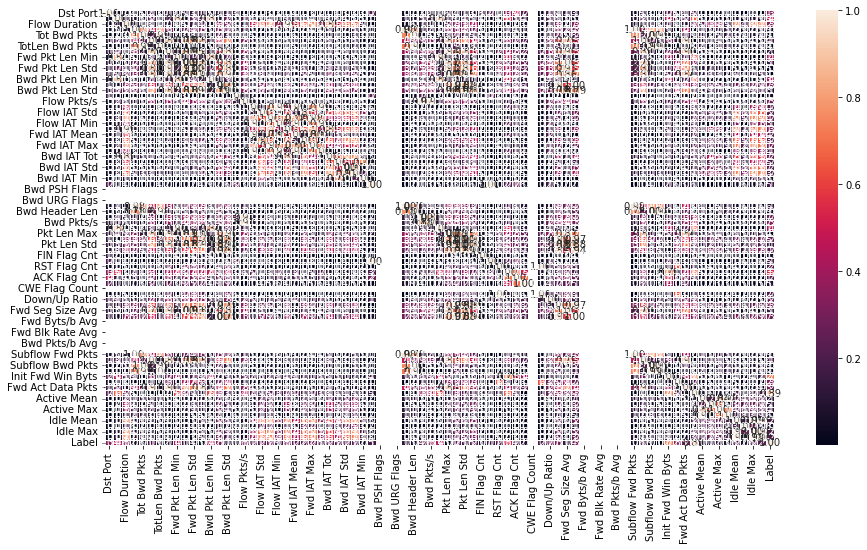

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(abs(toTrainModel.corr()), annot=True,
            linewidths=0.5, fmt='.2f', ax=ax)


Save label

In [153]:
highest_non_inf = allDatasetToTest.max().loc[lambda v: v<np.Inf].max()
allDatasetToTest.replace(np.Inf, highest_non_inf)

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
toTrainModel = toTrainModel.replace(np.nan, 0)
toTrainModel = toTrainModel.replace(np.inf, highest_non_inf)

allDatasetToTest = allDatasetToTest.replace(np.nan, 0)
allDatasetToTest = allDatasetToTest.replace(np.inf, highest_non_inf)


In [ ]:
labels = toTrainModel[LABEL]
toTrainModel = toTrainModel.drop([LABEL], axis=1)


In [154]:
labelsToTest = allDatasetToTest[LABEL]
allDatasetToTest = allDatasetToTest.drop([LABEL], axis=1)


In [ ]:
# toTrainModel = toTrainModel.drop(['Fwd Seg Size Min'], axis=1)


In [ ]:
print('Is any Nan:', np.any(np.isnan(toTrainModel)))
print('Is all finite:', np.all(np.isfinite(toTrainModel)))


In [ ]:
from sklearn.preprocessing import StandardScaler


def scale(dataToTransform, columntoTransform):

    ss_dict = {col: StandardScaler() for col in columntoTransform}

    for colKey in columntoTransform:
        dataToTransform[colKey] = ss_dict[colKey].fit_transform(
            np.array(dataToTransform[colKey]).reshape(-1, 1))

    return dataToTransform


Scale numeric values

In [ ]:
# numericColumntoTransform = toTrainModel.keys()
# toTrainModel = scale(toTrainModel, numericColumntoTransform)


In [ ]:
# numericColumntoTransform = allDatasetToTest.keys()
# allDatasetToTest = scale(allDatasetToTest, numericColumntoTransform)


#### After preprocess

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    toTrainModel, labels, test_size=0.33, random_state=32)


In [ ]:
X_trainTest, X_testTest, y_trainTest, y_testTest = train_test_split(
    allDatasetToTest, labelsToTest, test_size=0.33, random_state=32)


In [ ]:
isRFC = True
isMLPC = False
isSequential = False


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense


def model():
    if isRFC:
        model = RandomForestClassifier(
            n_estimators=100, max_depth=5, min_samples_leaf=4)
    elif isMLPC:
        model = MLPClassifier(random_state=32)
    else:
        model = Sequential([
            Dense(256, activation='softplus', kernel_initializer='glorot_uniform',
                  input_dim=X_train.shape[1]),
            Dense(128, activation='softplus',
                  kernel_initializer='glorot_uniform'),
            Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
        ])

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam')

    return model


In [ ]:
model = model()


In [ ]:
model.fit(X_train, y_train)


In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def confMatrix(yTrain, xTrainPreds, yTest, xTestPreds):
    # Your code here
    cmTrain = confusion_matrix(yTrain, xTrainPreds)
    X_train_disp = ConfusionMatrixDisplay(confusion_matrix=cmTrain)

    cmTest = confusion_matrix(yTest, xTestPreds)
    X_test_disp = ConfusionMatrixDisplay(confusion_matrix=cmTest)
    # End

    fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

    X_train_disp.plot(ax=ax[0])
    ax[0].set_title("Train")

    X_test_disp.plot(ax=ax[1])
    ax[1].set_title("Test")
    plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

X_train_preds = model.predict(X_train)
X_test_preds = model.predict(X_test)

if isSequential:
    print('Train auc:', roc_auc_score(y_train, X_train_preds))
    print('Test auc:', roc_auc_score(y_test, X_test_preds))
else:
    print('Train accuracy: ', accuracy_score(y_train, X_train_preds))
    print('Test accuracy: ', accuracy_score(y_test, X_test_preds))


In [ ]:
confMatrix(y_train, X_train_preds, y_test, X_test_preds)


In [ ]:
X_trainTest_preds = model.predict(X_trainTest)
X_testTest_preds = model.predict(X_testTest)

if isSequential:
    print('Train auc:', roc_auc_score(y_trainTest, X_trainTest_preds))
    print('Test auc:', roc_auc_score(y_testTest, X_testTest_preds))
else:
    print('Train accuracy: ', accuracy_score(y_trainTest, X_trainTest_preds))
    print('Test accuracy: ', accuracy_score(y_testTest, X_testTest_preds))


In [ ]:
confMatrix(y_trainTest, X_trainTest_preds, y_testTest, X_testTest_preds)


In [ ]:
# toTrainModel.to_csv('test.csv', index=False)
# print("Ready")
